In [2]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#define the generic equation to be solved = Volume as a function of height
def vol(height):
    #thinking about this as a volume of rotation with h = 11/1.75 r
    #V = pi * integral(r^2*dh)
    #Always just start at the h that solves r = 7.5/2 -> h=23.57143
    #V = pi * integral(from 23.57143 to 23.57143+h)( (1.75/11h)^2 *dh)
    #V = 0.0253*pi (1/3*h^3 | 23.57143+h and 23.57143)
    #V = 0.0084366*pi ( (23.57132 + h)^3 - (23.57143)^3)
    #V = 0.0265 (h^3 + 3(23.57143)(h)(23.57143+h))
    #V = 0.0265h^3 + 1.8739h^2 + 44.1712h
    volume = 0.0265*height**3 + 1.87*height**2 + 44.17*height
    return volume

In [18]:
#define derivative of volume equation
def deriv(height):
    #derivative of volume formula
    #(1/3)(0.0265)h^2 + (1/2)(1.8739)h + 44.1712
    der = (1/3)*(0.0265)*height**2 + (1/2)*(1.87)*height + 44.17
    return der

In [62]:
#Use Newton's Method to approximate solutions of an equation
# Inputs:
#   formula = formula function to solve
#   derivative = derivative function of the previous formula
#   guess = an initial guess of x-value solution
#   precision = how small your error will be
#   equalVal (default of 0) = the number to set your formula function equal to (given y-value)
#
# Output: x-value that is an approximate solution to the given function

def NewtonsMethod(formula,derivative,guess,precision,equalsVal=0):
    
    #calculate new x-value guess based on old guess, it's y-value, and it's derivative
    xnew = guess - (formula(equalsVal,guess)/derivative(guess))

    #check if the difference in old and new guesses is within allowed precision
    if(np.abs(guess-xnew)<precision):
        #return the new guess as the solution
        return xnew
    
    #if the difference is not within the allowed precision, recall NewtonsMethod with the new guess
    return NewtonsMethod(formula,derivative,xnew,precision,equalsVal)


In [63]:
#defines the function to solve given a specific y-value (volume)
def specificVolequation(ml,height):
    
    #subtract off the given ml volume from the equation (to make it = 0)
    genVol = vol(height)
    return genVol-ml

In [67]:
#find the height associated with a given ml volume using Newton's Method
def findheight(ml):
    h = NewtonsMethod(specificVolequation,deriv,11,0.001,equalsVal=ml)
    
    #round the answer to 3 decimal places to allign with precision of 0.001
    h = round(h,3)
    return h

In [78]:
#create arrays of volumes and heights

#assign array of volumes 0-1000 (steps of 1)
volumes = np.arange(0,1000,1)
heights = np.zeros(1000)

#assign array of heights the approximated heights found by findheight function for each volume
for i in range(1000):
    heights[i]=findheight(volumes[i])
    

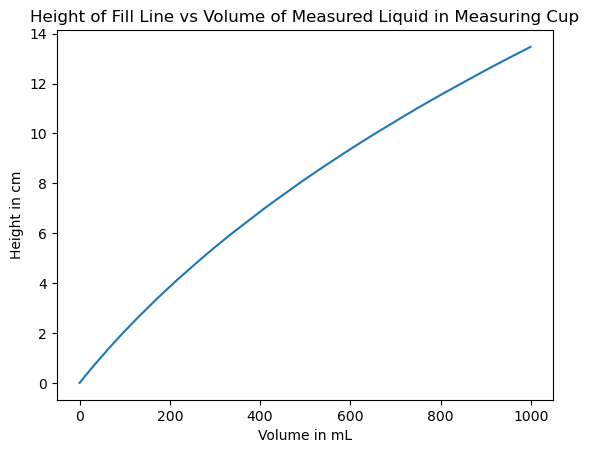

In [80]:
#plot the 1000 heights vs volumes
plt.plot(volumes,heights)
plt.xlabel("Volume in mL")
plt.ylabel("Height in cm")
plt.title("Height of Fill Line vs Volume of Measured Liquid in Measuring Cup")
plt.show()